In [46]:
!pip install foursquare
!pip install nose
import requests #library to handle requests
import pandas as pd #library for data analysis
import numpy as np #library to handle data in a vectorized manner
import random #Library for random number generation
!pip install geopy
from geopy.geocoders import Nominatim #module to convert an address into latitude and longitude values

#libraries for displaying images
from IPython.display import Image
from IPython.core.display import HTML

#transforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium==0.5.0
import folium #plotting library
from folium import features
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

import seaborn

print('Folium installed')
print('Libraries imported')


Folium installed
Libraries imported


###Importing and observing the data 

In [47]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ec27def23f5e421a8c9f8c009fdd9254 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_ec27def23f5e421a8c9f8c009fdd9254 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_ec27def23f5e421a8c9f8c009fdd9254 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Jmj3VryHNKp9JmErLwaxFbII2k2a83ewCjC_DFv6OLN_',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ec27def23f5e421a8c9f8c009fdd9254)

body = client_ec27def23f5e421a8c9f8c009fdd9254.get_object(Bucket='applieddatasciencefinalproject-donotdelete-pr-gf9ymlp8njco1l',Key='bar_locations.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17


In [52]:
df.count

<bound method DataFrame.count of             Location Type  Incident Zip           City        Borough  \
0     Club/Bar/Restaurant       10308.0  STATEN ISLAND  STATEN ISLAND   
1     Club/Bar/Restaurant       10012.0       NEW YORK      MANHATTAN   
2     Club/Bar/Restaurant       10308.0  STATEN ISLAND  STATEN ISLAND   
3     Club/Bar/Restaurant       10034.0       NEW YORK      MANHATTAN   
4     Club/Bar/Restaurant       11220.0       BROOKLYN       BROOKLYN   
...                   ...           ...            ...            ...   
2435  Club/Bar/Restaurant       11211.0       BROOKLYN       BROOKLYN   
2436  Club/Bar/Restaurant       11104.0      SUNNYSIDE         QUEENS   
2437  Club/Bar/Restaurant       10012.0       NEW YORK      MANHATTAN   
2438  Club/Bar/Restaurant       10304.0  STATEN ISLAND  STATEN ISLAND   
2439  Club/Bar/Restaurant       11423.0         HOLLIS         QUEENS   

       Latitude  Longitude  num_calls  
0     40.544096 -74.141155         40  
1     40.7

In [53]:
df.shape

(2440, 7)

###A bar graph was created to observe what neighborhoods to look for higer volumes of bars/restaurants

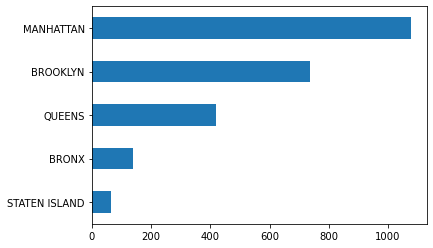

In [49]:
df.Borough.value_counts(ascending=True).tail().plot.barh();

###A heat map was created to observe the neighborhoods with higher volumes of bars/restaurants

In [51]:
pubs_map = folium.Map(location=[40.742459, -73.971765], zoom_start=12)
data = [[x[0], x[1], 1] for x in np.array(df[['Latitude', 'Longitude']])]
HeatMap(data, radius = 20).add_to(pubs_map)
pubs_map